# Final Project San Francisco Permit Data Analysis

Data from [kaggle.com](https://www.kaggle.com/datasets/aparnashastry/building-permit-applications-data?select=Building_Permits.csv)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Building_Permits.csv')

In [5]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


Rename the columns so they are easier to work with

In [6]:
df.columns = ['permit_num', 'permit_type', 'permit_type_def',
       'permit_create_date', 'block', 'lot', 'st_number','st_num_suffix', 'st_name',
       'st_suffix','unit','unit_suffix', 'description', 'current_status', 'current_status_date',
       'filed_date', 'issued_date', 'completed_date',
       'first_construction_doc_date','struc_notification', 'num_exist_stories',
       'num_proposed_stories','voluntary_retrofit','fire_only', 'permit_expire_date',
       'est_cost', 'rev_cost', 'existing_use', 'existing_units',
       'proposed_use', 'proposed_units', 'plansets','tidf_comp',
       'exist_construct_type', 'exist_construct_type_descript',
       'proposed_construct_type', 'proposed_construct_type_descript','site_permit',
       'super_district', 'neighborhood', 'zipcode',
       'location', 'record_id']

Turn the date columns into datetime formats with pandas

In [7]:
df.permit_create_date = pd.to_datetime(df['permit_create_date'])
df.current_status_date = pd.to_datetime(df['current_status_date'])
df.filed_date = pd.to_datetime(df['filed_date'])
df.issued_date = pd.to_datetime(df['issued_date'])
df.completed_date = pd.to_datetime(df['completed_date'])
df.first_construction_doc_date = pd.to_datetime(df['first_construction_doc_date'])
df.permit_expire_date = pd.to_datetime(df['permit_expire_date'])

# Data Description

Whenever contracters or property owners want to perform any construction, electrical, mechanical, and plumbing on a property in San Francisco, they have to obtain a building permit from the SF Department of Building Inspection. This data set contains records of SF building permit applications from January 2013 to February 2018.

Some key columns:

1. **permit_type** - denotes type of permit, 1 through 8
2. **permit_create_date** - date permit is created
3. **block** - the block the building is located in
4. **lot** - the lot the building is located in
5. **st_number** - building street number
6. **st_name** - building street name
7. **st_suffix** - building street suffix
8. **description** - details about purpose of the permit
9. **current_status** - up to date status of the permit
10. **issued_date** - date permit was issued 
11. **completed_date** - date project was completed
12. **first_construction_doc_date** - first documented date of construction on project
13. **num_exist_stories** - number of stories of building
14. **permit_expire_date** - date the permit expired
15. **est_cost** - estimated cost of project
16. **rev_cost** - revised cost of project
17. **existing_use** - use of building
18. **exist_construct_type** - construction type required for project
19. **super_district** - supervisor district building is located in
20. **neighborhood** - neighborhood building is located in
21. **zipcode** - zipcode building is located in
22. **location** - longitude and latitude of building 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   permit_num                        198900 non-null  object        
 1   permit_type                       198900 non-null  int64         
 2   permit_type_def                   198900 non-null  object        
 3   permit_create_date                198900 non-null  datetime64[ns]
 4   block                             198900 non-null  object        
 5   lot                               198900 non-null  object        
 6   st_number                         198900 non-null  int64         
 7   st_num_suffix                     2216 non-null    object        
 8   st_name                           198900 non-null  object        
 9   st_suffix                         196132 non-null  object        
 10  unit                            

The total dataset includes records of 198,900 building permit applications. These records are described by 43 different variables, and the dataset includes strings, integers, floats, and date/time entries.

# Null Values

Now time to explore NaN values and see how we can address them

In [9]:
na_values = list(df.isna().sum())
na_df = pd.DataFrame()
na_percent=[]
for a in na_values:
    na = a/len(df)*100
    na_percent.append(na)
na_df['columns'] = list(df.columns)
na_df['na_values'] = na_values
na_df['na_percent'] = na_percent
na_df

,columns,na_values,na_percent
0,permit_num,0,0.000000
1,permit_type,0,0.000000
2,permit_type_def,0,0.000000
3,permit_create_date,0,0.000000
4,block,0,0.000000
5,lot,0,0.000000
6,st_number,0,0.000000
7,st_num_suffix,196684,98.885872
8,st_name,0,0.000000
9,st_suffix,2768,1.391654


In [10]:
na_df[na_df.na_percent>80]

,columns,na_values,na_percent
7,st_num_suffix,196684,98.885872
10,unit,169421,85.178984
11,unit_suffix,196939,99.014077
19,struc_notification,191978,96.519859
22,voluntary_retrofit,198865,99.982403
23,fire_only,180073,90.534439
32,tidf_comp,198898,99.998994
37,site_permit,193541,97.305681


I think if a column is >80% missing values, we can probably drop it. We'll start collecting which columns we want to drop, and drop them in a group later. 

In [11]:
columns_To_Drop=['st_num_suffix','unit','unit_suffix','struc_notification','voluntary_retrofit',
                 'fire_only','tidf_comp','site_permit']

If a column has a proposed version, nearly every time it matches the existing use. We can fill NaN values of one column with the proposed version, then forward fill the remainder. It doesn't change the spread of those columns by much. 

In [12]:
df.num_exist_stories.fillna(df.num_proposed_stories,inplace=True)
df.num_proposed_stories.fillna(df.num_exist_stories,inplace=True)
df.num_exist_stories.fillna(method = 'ffill',inplace=True)
df.num_proposed_stories.fillna(method = 'ffill',inplace=True)

Similar way to deal with the estimated and revised costs, drop remaining NaN.

In [13]:
df.est_cost.fillna(df.rev_cost,inplace=True)
df.rev_cost.fillna(df.est_cost,inplace=True)
df.dropna(subset=['est_cost'],inplace=True)
df['cost_diff']=df.rev_cost-df.est_cost

Around 1700 datapoints missing neighborhood, so we can drop those. Then only one row is missing a zipcode, so we can drop that as well. 

In [14]:
df.dropna(subset=['neighborhood'],inplace=True)

In [15]:
df.dropna(subset=['zipcode'],inplace=True)

I'm not sure how we can use the description column, since there are so many different categories. Pulling out the length of the description as a possible indication of effort on the permit application is the best I can think of. 

In [16]:
descr_len=[]
for a in df.description:
    descr_len.append(len(str(a)))
df['descr_len']=descr_len
columns_To_Drop.append('description')

Most of existing_use are in the top 10 most common uses, so we'll keep those and turn the rest into 'other'. This saves us some dummy columns later on.

In [17]:
df.groupby('existing_use',dropna=False)['record_id'].count().nlargest(15)

existing_use
1 family dwelling       46721
apartments              40393
NaN                     39903
office                  24392
2 family dwelling       20852
retail sales             6832
food/beverage hndlng     4819
vacant lot               1804
tourist hotel/motel      1655
residential hotel        1020
warehouse,no frnitur      866
school                    671
clinics-medic/dental      546
manufacturing             507
church                    467
Name: record_id, dtype: int64

In [18]:
df.existing_use.fillna(df.proposed_use,inplace=True)
df.existing_use.fillna(method='ffill',inplace=True)

In [19]:
simp_use = list(df.groupby('existing_use',dropna=False)['record_id'].count().nlargest(10).index)
df['simple_use'] = df.existing_use.apply(lambda x: x if x in simp_use else 'other')

We can do the same thing with st_suffix

In [20]:
simp_st = list(df.groupby('st_suffix',dropna=False)['current_status'].count().nlargest(5).index)
df['simple_st_suf'] = df.st_suffix.apply(lambda x: x if x in simp_st else 'other')

In [21]:
columns_To_Drop.append('existing_use')
columns_To_Drop.append('proposed_use')
columns_To_Drop.append('st_suffix')

Fill the remaining columns we can use, mostly through forward fill unless we have a proposed column to help fill. 

In [22]:
df.st_suffix.fillna(method='ffill',inplace=True)

In [23]:
df.existing_units.fillna(df.proposed_units,inplace=True)
df.existing_units.fillna(method='ffill',inplace=True)

In [24]:
df.plansets.fillna(method='ffill',inplace=True)

In [25]:
df.exist_construct_type.fillna(df.proposed_construct_type,inplace=True)
df.exist_construct_type.fillna(method='ffill',inplace=True)

We drop the columns that are too similar to others, don't have much info, or we can't analyze well

In [26]:
columns_To_Drop = columns_To_Drop + ['permit_type_def','exist_construct_type_descript',
                 'proposed_construct_type_descript','description',
                 'proposed_construct_type','proposed_units','existing_use','num_proposed_stories','permit_num',
                                    'record_id','current_status_date']

For the most part, permit_create_date = filed_date. We're keeping permit_create_date, dropping filed_date.

In [27]:
len(df[df.filed_date!=df.permit_create_date])

491

In [28]:
columns_To_Drop.append('filed_date')

Now we drop the columns that we've decided need to go, and create a few separate DataFrames for specific statuses. 

In [29]:
df.drop(columns=columns_To_Drop,inplace=True)

In [30]:
df_complete = df[df.current_status=='complete']
df_expire = df[df.current_status=='expired']
df_issued = df[df.current_status=='issued']

Lastly, drop the date columns from our main DF, since they have missing values. We can analyze times in our status specific dataframes above. Turn permit_create_date into a year column.

In [31]:
df['year']=pd.DatetimeIndex(df['permit_create_date']).year

In [32]:
df.drop(columns=['permit_create_date','issued_date','completed_date',
                 'first_construction_doc_date','permit_expire_date'],inplace=True)

In [33]:
df.isna().sum()

permit_type             0
block                   0
lot                     0
st_number               0
st_name                 0
current_status          0
num_exist_stories       0
est_cost                0
rev_cost                0
existing_units          0
plansets                0
exist_construct_type    0
super_district          0
neighborhood            0
zipcode                 0
location                0
cost_diff               0
descr_len               0
simple_use              0
simple_st_suf           0
year                    0
dtype: int64

All missing values filled or eliminated! 

# Data Exploration

In [34]:
# Finds the total amount of projects completed, and the % of the cleaned
# dataset that are completed projects

len(df_complete)

print(str((len(df_complete)/len(df))*100) + '% of the dataset are completed projects') 

96328

49.002930164414785% of the dataset are completed projects


Out of all the projects in the cleaned dataset, only 96,275 of the projects were completed. That's about 48.98% of the cleaned dataset.

Let's see how many different values each column has

In [35]:
for a in df.columns:
    print(str(a)+' ' +str(df[a].nunique()))

permit_type 8
block 4875
lot 1045
st_number 5095
st_name 1699
current_status 14
num_exist_stories 63
est_cost 11379
rev_cost 12806
existing_units 361
plansets 8
exist_construct_type 5
super_district 11
neighborhood 41
zipcode 27
location 57517
cost_diff 6847
descr_len 300
simple_use 11
simple_st_suf 6
year 7


**Problem:** permit_type, block, lot, st_number, st_name, st_suffix, current_status, plansets, exist_construct_type, super_district, neighborhood, and zipcode are all categorical values. Some we can create dummy columns for some, but for  categories with # of unique values larger than 50, it's not very feasible. We'll explore that later. 

In [36]:
df.groupby('neighborhood').agg({'rev_cost':['mean','max','min','size'],'descr_len':'mean'})

rev_cost                           \
                                        mean          max  min   size   
neighborhood                                                            
Bayview Hunters Point           4.594571e+05   81000000.0  0.0   5655   
Bernal Heights                  8.601537e+04    7000000.0  0.0   6042   
Castro/Upper Market             5.149164e+04   20000000.0  0.0   8498   
Chinatown                       9.676383e+04   27676322.0  0.0   3750   
Excelsior                       4.681223e+04   67000000.0  0.0   3060   
Financial District/South Beach  3.630490e+05  520000000.0  0.0  21791   
Glen Park                       4.261605e+04    1500000.0  0.0   2626   
Golden Gate Park                2.209904e+05    5500000.0  0.0     64   
Haight Ashbury                  3.240889e+04   15000000.0  0.0   5786   
Hayes Valley                    1.323456e+05  156880000.0  0.0   5476   
Inner Richmond                  3.443064e+04    8973490.0  0.0   4446   
Inner Sunset                    3.229022e+04    3000000.0  0.0   5752   
Japantown                       2.738024e+05    5200000.0  0.0    698   
Lakeshore                       4.563421e+05  131000000.0  0.0   1308   
Lincoln Park                    2.121032e+04     336838.0  1.0     49   
Lone Mountain/USF               9.408619e+04   38000000.0  0.0   3340   
Marina                          5.643289e+04   21000000.0  0.0   8222   
McLaren Park                    2.488568e+04     300000.0  1.0     45   
Mission                         2.016145e+05  400000000.0  0.0  14630   
Mission Bay                     1.006300e+06  780500000.0  0.0   2281   
Nob Hill                        8.821540e+04   96500000.0  0.0   5995   
Noe Valley                      4.321481e+04    3500000.0  0.0   7822   
North Beach                     6.497768e+04    6750000.0  0.0   4049   
Oceanview/Merced/Ingleside      4.572135e+04   15000000.0  0.0   2649   
Outer Mission                   4.112871e+04    5050000.0  0.0   2231   
Outer Richmond                  3.583035e+04   30000000.0  0.0   7819   
Pacific Heights                 6.009239e+04   62000000.0  0.0   8483   
Portola                         2.603758e+04     750000.0  0.0   1428   
Potrero Hill                    3.039219e+05  191000000.0  0.0   4285   
Presidio                        1.023035e+05    2308000.0  0.0     51   
Presidio Heights                5.029265e+04   15077340.0  0.0   4073   
Russian Hill                    4.307633e+04   13500000.0  0.0   5474   
Seacliff                        6.200362e+04    5500000.0  0.0    989   
South of Market                 3.492110e+05  266061486.0  0.0   7556   
Sunset/Parkside                 2.985087e+04   30000000.0  0.0  10155   
Tenderloin                      3.769954e+05  143982500.0  0.0   4769   
Treasure Island                 3.141052e+05   15000000.0  0.0     81   
Twin Peaks                      4.504224e+04   10400000.0  0.0   1695   
Visitacion Valley               6.074610e+04   22423200.0  0.0    898   
West of Twin Peaks              3.327577e+04    8200000.0  0.0   8700   
Western Addition                2.222839e+05  105000000.0  0.0   3855   

                                 descr_len  
                                      mean  
neighborhood                                
Bayview Hunters Point           109.102918  
Bernal Heights                  102.464912  
Castro/Upper Market              93.235938  
Chinatown                       113.024800  
Excelsior                        89.673203  
Financial District/South Beach  130.602726  
Glen Park                        93.637091  
Golden Gate Park                139.859375  
Haight Ashbury                   88.487902  
Hayes Valley                     93.720051  
Inner Richmond                   88.676788  
Inner Sunset                     89.689847  
Japantown                       108.385387  
Lakeshore                       151.052752  
Lincoln Park                    111.918367  
Lone Mountain

In [37]:
yrs = ['2012','2013','2014','2015','2016','2017','2018','2019']
for y in yrs:
    print (y+': '+str(len(df[df.year.apply(lambda x: True if y in str(x) else False)])))


2012: 22
2013: 34865
2014: 36205
2015: 39630
2016: 39303
2017: 40700
2018: 5851
2019: 0


In [38]:
df.groupby('permit_type')['neighborhood'].count().nlargest(8)

permit_type
8    176642
3     14609
4      2840
2       949
6       595
7       505
1       345
5        91
Name: neighborhood, dtype: int64

<AxesSubplot:xlabel='count', ylabel='current_status'>

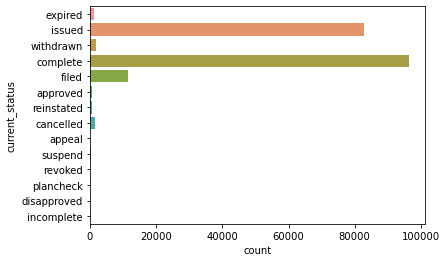

In [39]:
sns.countplot(data=df,y="current_status")

<AxesSubplot:xlabel='count', ylabel='neighborhood'>

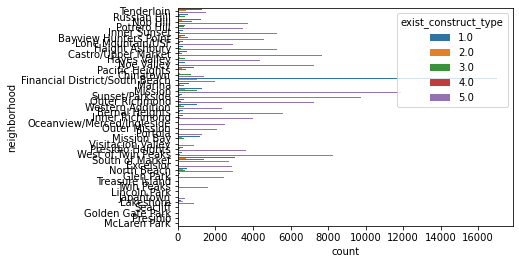

In [40]:
sns.countplot(data=df,y='neighborhood',hue='exist_construct_type')

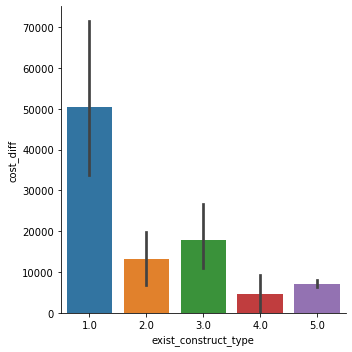

In [41]:
sns.catplot(x='exist_construct_type',y='cost_diff',data=df,kind='bar')

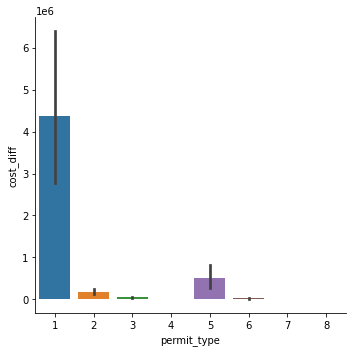

In [42]:
sns.catplot(x='permit_type',y='cost_diff',data=df,kind='bar')

# Clean for Machine Learning

Time to clean it even further for some Machine Learning processes. 

In [43]:
df_st = df.copy()

In [44]:
df_st.head()

,permit_type,block,lot,st_number,st_name,current_status,num_exist_stories,est_cost,rev_cost,existing_units,plansets,exist_construct_type,super_district,neighborhood,zipcode,location,cost_diff,descr_len,simple_use,simple_st_suf,year
0,4,0326,023,140,Ellis,expired,6.0,4000.0,4000.0,143.0,2.0,3.0,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",0.0,106,tourist hotel/motel,St,2015
1,4,0306,007,440,Geary,issued,7.0,1.0,500.0,143.0,2.0,3.0,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",499.0,39,tourist hotel/motel,St,2016
2,3,0595,203,1647,Pacific,withdrawn,6.0,20000.0,20000.0,39.0,2.0,1.0,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",0.0,31,retail sales,Av,2016
3,8,0156,011,1230,Pacific,complete,2.0,2000.0,2000.0,1.0,2.0,5.0,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",0.0,40,1 family dwelling,Av,2016
4,6,0342,001,950,Market,issued,3.0,100000.0,100000.0,1.0,2.0,3.0,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",0.0,50,retail sales,St,2016


In [45]:
df_st.shape

(196576, 21)

To feed into Classification, we want to save permit_type, year, block, lot, simple_st_number, st_name, st_suffix, current_status, num_exist_stories, est/rev_cost, existing_units, plansets, exist_construct_type, super_district, neighborhood, and zipcode, cost_diff, descr_len, simple_use. A total of 20 different columns, but some will have to be split into dummies.

For the columns that have too many different categorical values, we'll frequency encode them. This should represent how often permits are processed for that specific block, lot, st_number, or st_name. It might have implications for how often or quickly permits are completed. 

We'll also drop location, but it could be useful in the future for different map graphs. 

**To be frequency encoded:** block, lot, st_number, st_name

**To be one hot encoded/dummied:** permit_type, year, st_suffix, current_status, existing_use, plansets, exist_construct_type, super_district, neighborhood, zipcode

**To be left as is:** num_exist_stories, est_cost, rev_cost, existing_units

After all this, I should be left with 148 columns. A lot, but hopefully workable. 

### Create Frequency Columns

block, lot, st_number, st_name

In [46]:
enc_block = df_st.groupby('block').size()
enc_lot = df_st.groupby('lot').size()
enc_st_number = df_st.groupby('st_number').size()
enc_st_name = df_st.groupby('st_name').size()

In [47]:
df_st['block_freq_enc'] = df_st['block'].apply(lambda x : enc_block[x])
df_st['lot_freq_enc'] = df_st['lot'].apply(lambda x : enc_lot[x])
df_st['st_num_freq_enc'] = df_st['st_number'].apply(lambda x : enc_st_number[x])
df_st['st_name_freq_enc'] = df_st['st_name'].apply(lambda x : enc_st_name[x])

In [48]:
df_st.drop(columns=['block','lot','st_number','st_name','location'],inplace=True)

### Create Dummy Columns

permit_type, year, simple_st_suffix, current_status, simple_use, plansets, exist_construct_type, super_district, neighborhood, zipcode

In [49]:
df_st_dum = pd.get_dummies(df_st, columns=['permit_type','year','simple_st_suf','simple_use',
                                           'current_status',
                                       'plansets','exist_construct_type','super_district',
                                       'neighborhood','zipcode'])

In [50]:
df_st_dum.head()

,num_exist_stories,est_cost,rev_cost,existing_units,cost_diff,descr_len,block_freq_enc,lot_freq_enc,st_num_freq_enc,st_name_freq_enc,permit_type_1,permit_type_2,permit_type_3,permit_type_4,permit_type_5,permit_type_6,permit_type_7,permit_type_8,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,simple_st_suf_Av,simple_st_suf_Bl,simple_st_suf_Dr,simple_st_suf_St,simple_st_suf_Wy,simple_st_suf_other,simple_use_1 family dwelling,simple_use_2 family dwelling,simple_use_apartments,simple_use_food/beverage hndlng,simple_use_office,simple_use_other,simple_use_residential hotel,simple_use_retail sales,simple_use_tourist hotel/motel,simple_use_vacant lot,"simple_use_warehouse,no frnitur",current_status_appeal,current_status_approved,current_status_cancelled,current_status_complete,current_status_disapproved,current_status_expired,current_status_filed,current_status_incomplete,current_status_issued,current_status_plancheck,current_status_reinstated,current_status_revoked,current_status_suspend,current_status_withdrawn,plansets_0.0,plansets_1.0,plansets_2.0,plansets_3.0,plansets_4.0,plansets_6.0,plansets_20.0,plansets_9000.0,exist_construct_type_1.0,exist_construct_type_2.0,exist_construct_type_3.0,exist_construct_type_4.0,exist_construct_type_5.0,super_district_1.0,super_district_2.0,super_district_3.0,super_district_4.0,super_district_5.0,super_district_6.0,super_district_7.0,super_district_8.0,super_district_9.0,super_district_10.0,super_district_11.0,neighborhood_Bayview Hunters Point,neighborhood_Bernal Heights,neighborhood_Castro/Upper Market,neighborhood_Chinatown,neighborhood_Excelsior,neighborhood_Financial District/South Beach,neighborhood_Glen Park,neighborhood_Golden Gate Park,neighborhood_Haight Ashbury,neighborhood_Hayes Valley,neighborhood_Inner Richmond,neighborhood_Inner Sunset,neighborhood_Japantown,neighborhood_Lakeshore,neighborhood_Lincoln Park,neighborhood_Lone Mountain/USF,neighborhood_Marina,neighborhood_McLaren Park,neighborhood_Mission,neighborhood_Mission Bay,neighborhood_Nob Hill,neighborhood_Noe Valley,neighborhood_North Beach,neighborhood_Oceanview/Merced/Ingleside,neighborhood_Outer Mission,neighborhood_Outer Richmond,neighborhood_Pacific Heights,neighborhood_Portola,neighborhood_Potrero Hill,neighborhood_Presidio,neighborhood_Presidio Heights,neighborhood_Russian Hill,neighborhood_Seacliff,neighborhood_South of Market,neighborhood_Sunset/Parkside,neighborhood_Tenderloin,neighborhood_Treasure Island,neighborhood_Twin Peaks,neighborhood_Visitacion Valley,neighborhood_West of Twin Peaks,neighborhood_Western Addition,zipcode_94102.0,zipcode_94103.0,zipcode_94104.0,zipcode_94105.0,zipcode_94107.0,zipcode_94108.0,zipcode_94109.0,zipcode_94110.0,zipcode_94111.0,zipcode_94112.0,zipcode_94114.0,zipcode_94115.0,zipcode_94116.0,zipcode_94117.0,zipcode_94118.0,zipcode_94121.0,zipcode_94122.0,zipcode_94123.0,zipcode_94124.0,zipcode_94127.0,zipcode_94129.0,zipcode_94130.0,zipcode_94131.0,zipcode_94132.0,zipcode_94133.0,zipcode_94134.0,zipcode_94158.0
0,6.0,4000.0,4000.0,143.0,0.0,106,157,3370,491,411,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7.0,1.0,500.0,143.0,499.0,39,145,5255,162,1932,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6.0,20000.0,20000.0,39.0,0.0,31,61,50,53,1412,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [51]:
df_st_dum.shape

(196576, 148)

In [52]:
df_st_dum.isna().sum().sum()

0

# Correlations

We have to get rid of some columns like zipcode, neighborhood, and the costs that will be very correlated already

In [53]:
df_corr = df_st.copy()

In [54]:
df_corr.head()

,permit_type,current_status,num_exist_stories,est_cost,rev_cost,existing_units,plansets,exist_construct_type,super_district,neighborhood,zipcode,cost_diff,descr_len,simple_use,simple_st_suf,year,block_freq_enc,lot_freq_enc,st_num_freq_enc,st_name_freq_enc
0,4,expired,6.0,4000.0,4000.0,143.0,2.0,3.0,3.0,Tenderloin,94102.0,0.0,106,tourist hotel/motel,St,2015,157,3370,491,411
1,4,issued,7.0,1.0,500.0,143.0,2.0,3.0,3.0,Tenderloin,94102.0,499.0,39,tourist hotel/motel,St,2016,145,5255,162,1932
2,3,withdrawn,6.0,20000.0,20000.0,39.0,2.0,1.0,3.0,Russian Hill,94109.0,0.0,31,retail sales,Av,2016,61,50,53,1412
3,8,complete,2.0,2000.0,2000.0,1.0,2.0,5.0,3.0,Nob Hill,94109.0,0.0,40,1 family dwelling,Av,2016,103,4200,99,1412
4,6,issued,3.0,100000.0,100000.0,1.0,2.0,3.0,6.0,Tenderloin,94102.0,0.0,50,retail sales,St,2016,94,9770,198,5405


In [55]:
df_corr.drop(columns=['zipcode','super_district','est_cost'],inplace=True)

In [56]:
df_cor_dum = pd.get_dummies(df_corr, columns=['permit_type','year','simple_st_suf','simple_use',
                                           'current_status',
                                       'plansets','exist_construct_type',
                                       'neighborhood'])

In [57]:
cor = df_corr.corr()

In [58]:
cor[cor<1].stack().nlargest(30)[::2]

rev_cost           cost_diff           0.570875
num_exist_stories  block_freq_enc      0.480252
                   st_num_freq_enc     0.431977
block_freq_enc     st_name_freq_enc    0.420186
num_exist_stories  st_name_freq_enc    0.384022
block_freq_enc     st_num_freq_enc     0.292128
num_exist_stories  existing_units      0.266292
descr_len          block_freq_enc      0.133613
st_num_freq_enc    st_name_freq_enc    0.115093
lot_freq_enc       st_num_freq_enc     0.103855
descr_len          st_num_freq_enc     0.092928
num_exist_stories  descr_len           0.087255
descr_len          st_name_freq_enc    0.072623
existing_units     st_name_freq_enc    0.059446
                   st_num_freq_enc     0.054308
dtype: float64

# Machine Learning

## 1. Classification for Status Prediction

All you have to do is select which status you want to predict for, set that as your Y, and drop the other status columns!

We'll be using it for predicting Completed and Expired.

In [59]:
import sklearn as sk
import sklearn.tree as tree
import pydotplus
from IPython.display import Image  

In [60]:
df_st_dum.head()

,num_exist_stories,est_cost,rev_cost,existing_units,cost_diff,descr_len,block_freq_enc,lot_freq_enc,st_num_freq_enc,st_name_freq_enc,permit_type_1,permit_type_2,permit_type_3,permit_type_4,permit_type_5,permit_type_6,permit_type_7,permit_type_8,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,simple_st_suf_Av,simple_st_suf_Bl,simple_st_suf_Dr,simple_st_suf_St,simple_st_suf_Wy,simple_st_suf_other,simple_use_1 family dwelling,simple_use_2 family dwelling,simple_use_apartments,simple_use_food/beverage hndlng,simple_use_office,simple_use_other,simple_use_residential hotel,simple_use_retail sales,simple_use_tourist hotel/motel,simple_use_vacant lot,"simple_use_warehouse,no frnitur",current_status_appeal,current_status_approved,current_status_cancelled,current_status_complete,current_status_disapproved,current_status_expired,current_status_filed,current_status_incomplete,current_status_issued,current_status_plancheck,current_status_reinstated,current_status_revoked,current_status_suspend,current_status_withdrawn,plansets_0.0,plansets_1.0,plansets_2.0,plansets_3.0,plansets_4.0,plansets_6.0,plansets_20.0,plansets_9000.0,exist_construct_type_1.0,exist_construct_type_2.0,exist_construct_type_3.0,exist_construct_type_4.0,exist_construct_type_5.0,super_district_1.0,super_district_2.0,super_district_3.0,super_district_4.0,super_district_5.0,super_district_6.0,super_district_7.0,super_district_8.0,super_district_9.0,super_district_10.0,super_district_11.0,neighborhood_Bayview Hunters Point,neighborhood_Bernal Heights,neighborhood_Castro/Upper Market,neighborhood_Chinatown,neighborhood_Excelsior,neighborhood_Financial District/South Beach,neighborhood_Glen Park,neighborhood_Golden Gate Park,neighborhood_Haight Ashbury,neighborhood_Hayes Valley,neighborhood_Inner Richmond,neighborhood_Inner Sunset,neighborhood_Japantown,neighborhood_Lakeshore,neighborhood_Lincoln Park,neighborhood_Lone Mountain/USF,neighborhood_Marina,neighborhood_McLaren Park,neighborhood_Mission,neighborhood_Mission Bay,neighborhood_Nob Hill,neighborhood_Noe Valley,neighborhood_North Beach,neighborhood_Oceanview/Merced/Ingleside,neighborhood_Outer Mission,neighborhood_Outer Richmond,neighborhood_Pacific Heights,neighborhood_Portola,neighborhood_Potrero Hill,neighborhood_Presidio,neighborhood_Presidio Heights,neighborhood_Russian Hill,neighborhood_Seacliff,neighborhood_South of Market,neighborhood_Sunset/Parkside,neighborhood_Tenderloin,neighborhood_Treasure Island,neighborhood_Twin Peaks,neighborhood_Visitacion Valley,neighborhood_West of Twin Peaks,neighborhood_Western Addition,zipcode_94102.0,zipcode_94103.0,zipcode_94104.0,zipcode_94105.0,zipcode_94107.0,zipcode_94108.0,zipcode_94109.0,zipcode_94110.0,zipcode_94111.0,zipcode_94112.0,zipcode_94114.0,zipcode_94115.0,zipcode_94116.0,zipcode_94117.0,zipcode_94118.0,zipcode_94121.0,zipcode_94122.0,zipcode_94123.0,zipcode_94124.0,zipcode_94127.0,zipcode_94129.0,zipcode_94130.0,zipcode_94131.0,zipcode_94132.0,zipcode_94133.0,zipcode_94134.0,zipcode_94158.0
0,6.0,4000.0,4000.0,143.0,0.0,106,157,3370,491,411,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7.0,1.0,500.0,143.0,499.0,39,145,5255,162,1932,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6.0,20000.0,20000.0,39.0,0.0,31,61,50,53,1412,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [61]:
df_st.groupby('current_status')['current_status'].count().sort_values(ascending=False)

current_status
complete       96328
issued         82654
filed          11412
withdrawn       1737
cancelled       1528
expired         1364
approved         731
reinstated       559
suspend          193
revoked           49
plancheck         15
appeal             2
disapproved        2
incomplete         2
Name: current_status, dtype: int64

### Predicting Complete

Remove all the other status categories.

In [62]:
df_st_comp = df_st_dum.drop(columns=['current_status_appeal','current_status_approved',
                                 'current_status_cancelled','current_status_disapproved','current_status_expired',
                                'current_status_filed','current_status_incomplete','current_status_issued',
                                'current_status_plancheck','current_status_reinstated','current_status_revoked',
                                'current_status_suspend','current_status_withdrawn'])

In [63]:
Xc = df_st_comp.drop(columns=['current_status_complete'])
Yc = df_st_comp.current_status_complete

In [64]:
dtc = tree.DecisionTreeClassifier(max_depth=3)
dtc.fit(Xc,Yc)

DecisionTreeClassifier(max_depth=3)

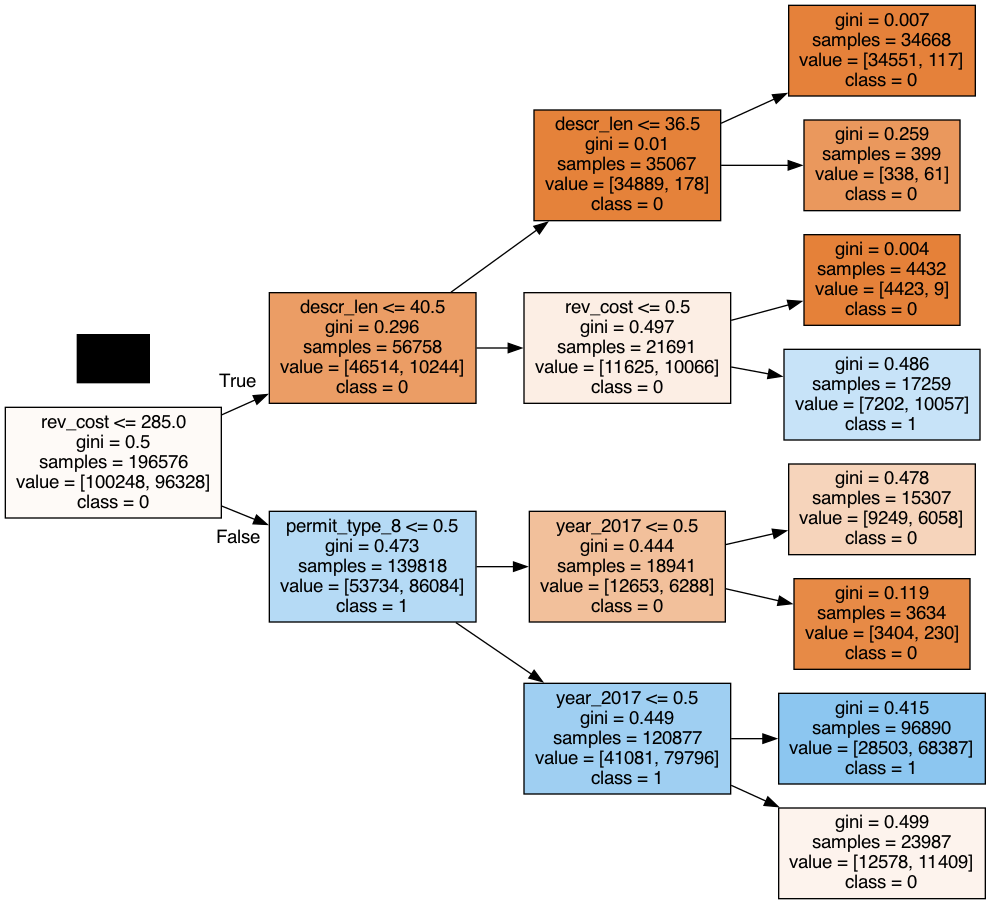

In [65]:
dtc_feature_names = list(Xc.columns)
dtc_target_names = [str(s) for s in Yc.unique()]
tree.export_graphviz(dtc, out_file='tree.dot', 
    feature_names=dtc_feature_names, class_names=dtc_target_names,
    filled=True,rotate=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Predict Expired

In [66]:
df_st_expired = df_st_dum.drop(columns=['current_status_appeal','current_status_approved',
                                 'current_status_cancelled','current_status_disapproved','current_status_issued',
                                'current_status_filed','current_status_incomplete','current_status_withdrawn',
                                'current_status_plancheck','current_status_reinstated','current_status_revoked',
                                'current_status_suspend','current_status_complete'])

In [67]:
Xe = df_st_expired.drop(columns=['current_status_expired'])
Ye = df_st_expired.current_status_expired

In [68]:
dte = tree.DecisionTreeClassifier(max_depth=3)
dte.fit(Xe,Ye)

DecisionTreeClassifier(max_depth=3)

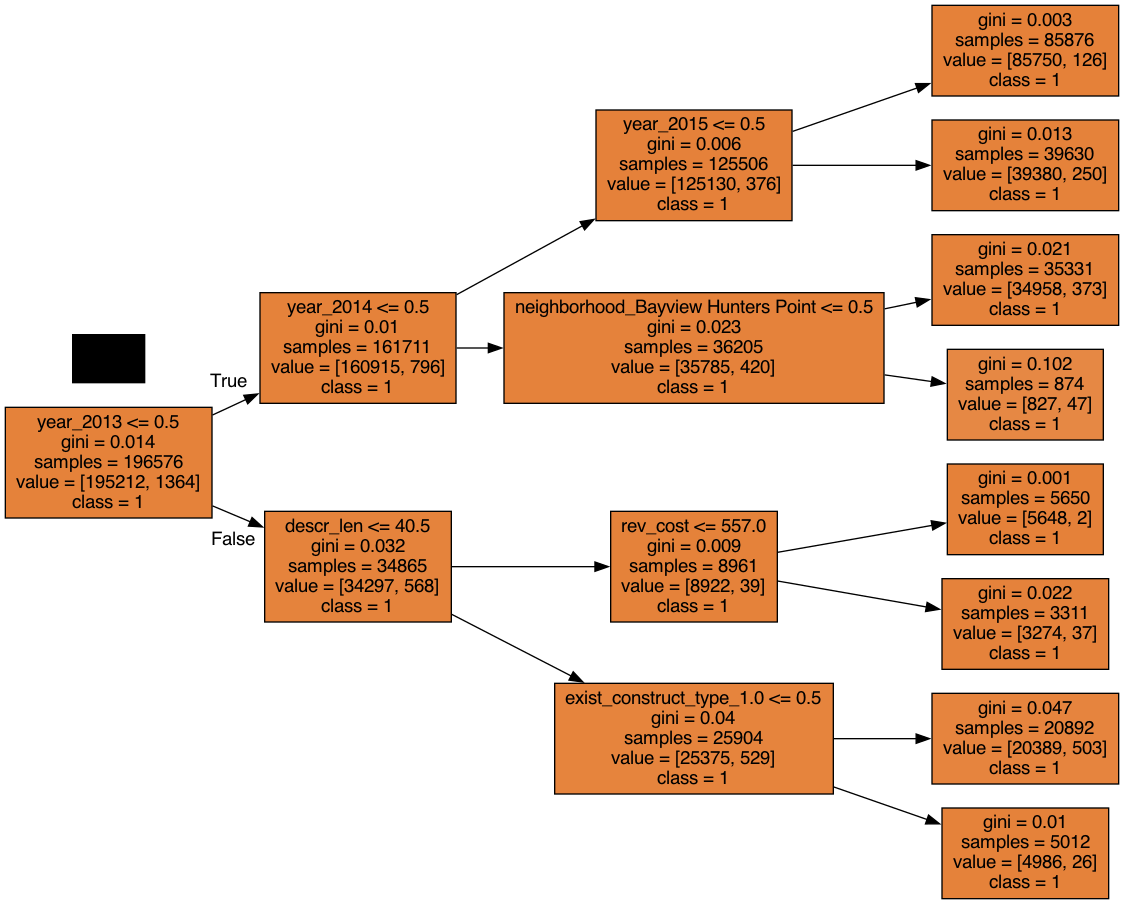

In [69]:
dte_feature_names = list(Xe.columns)
dte_target_names = [str(s) for s in Ye.unique()]
tree.export_graphviz(dte, out_file='tree.dot', 
    feature_names=dte_feature_names, class_names=dte_target_names,
    filled=True,rotate=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

## 2. Clustering

Using df_complete with Clustering to see if we can find anything that affects the time it takes to complete a project.

First that means that we have to create a column for how long it takes to complete a project, by taking the different between complete_date and permit_create_date. Also will require a bit of extra cleaning.

In [70]:
df_complete.head()

,permit_type,permit_create_date,block,lot,st_number,st_name,current_status,issued_date,completed_date,first_construction_doc_date,num_exist_stories,permit_expire_date,est_cost,rev_cost,existing_units,plansets,exist_construct_type,super_district,neighborhood,zipcode,location,cost_diff,descr_len,simple_use,simple_st_suf
3,8,2016-11-07,0156,011,1230,Pacific,complete,2017-07-18,2017-07-24,2017-07-18,2.0,2018-07-13,2000.0,2000.0,1.0,2.0,5.0,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",0.0,40,1 family dwelling,Av
6,8,2017-06-30,1739,020,1291,11th,complete,2017-06-30,2017-07-12,2017-06-30,3.0,2018-06-25,12000.0,12000.0,5.0,0.0,5.0,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",0.0,10,apartments,Av
48,8,2017-10-11,5934,020,938,Felton,complete,2017-10-11,2017-10-31,2017-10-11,2.0,2018-04-11,14000.0,14000.0,1.0,0.0,5.0,9.0,Portola,94134.0,"(37.72775517946509, -122.41419227409298)",0.0,9,1 family dwelling,St
91,3,2014-07-08,5900A,025,801,Silver,complete,2015-09-11,2017-09-08,2015-09-11,2.0,2016-09-05,15000.0,47000.0,1.0,2.0,3.0,9.0,Portola,94134.0,"(37.7295502279417, -122.41833852987313)",32000.0,53,other,Av
92,8,2014-08-25,3509,029,63,Grace,complete,2014-08-25,2017-10-04,2014-08-25,3.0,2015-08-20,500.0,500.0,4.0,0.0,5.0,6.0,South of Market,94103.0,"(37.774944547030586, -122.41443674356925)",0.0,48,apartments,St


In [71]:
df_complete.shape

(96328, 25)

In [72]:
df_complete.isna().sum()

permit_type                     0
permit_create_date              0
block                           0
lot                             0
st_number                       0
st_name                         0
current_status                  0
issued_date                    16
completed_date                  0
first_construction_doc_date    38
num_exist_stories               0
permit_expire_date             30
est_cost                        0
rev_cost                        0
existing_units                  0
plansets                        0
exist_construct_type            0
super_district                  0
neighborhood                    0
zipcode                         0
location                        0
cost_diff                       0
descr_len                       0
simple_use                      0
simple_st_suf                   0
dtype: int64

In [73]:
df_complete.dropna(subset=['issued_date','first_construction_doc_date',
                          'permit_expire_date'],inplace=True)

In [74]:
df_complete['complete_time'] = (df_complete.completed_date-df_complete.permit_create_date)/timedelta(days=1)

In [75]:
df_complete['construct_time']= (df_complete.completed_date-df_complete.first_construction_doc_date)/timedelta(days=1)

In [76]:
df_complete['year']=pd.DatetimeIndex(df_complete['permit_create_date']).year

In [77]:
enc_block = df_complete.groupby('block').size()
enc_lot = df_complete.groupby('lot').size()
enc_st_number = df_complete.groupby('st_number').size()
enc_st_name = df_complete.groupby('st_name').size()

In [78]:
df_complete['block_freq_enc'] = df_complete['block'].apply(lambda x : enc_block[x])
df_complete['lot_freq_enc'] = df_complete['lot'].apply(lambda x : enc_lot[x])
df_complete['st_num_freq_enc'] = df_complete['st_number'].apply(lambda x : enc_st_number[x])
df_complete['st_name_freq_enc'] = df_complete['st_name'].apply(lambda x : enc_st_name[x])

In [79]:
df_complete.groupby('neighborhood')['complete_time','construct_time','rev_cost'].mean()

,complete_time,construct_time,rev_cost
neighborhood,,,
Bayview Hunters Point,206.068075,175.389671,132366.274358
Bernal Heights,177.598369,155.787292,35684.182215
Castro/Upper Market,193.591317,170.326098,43096.366262
Chinatown,176.729522,159.337548,92764.401556
Excelsior,148.481161,129.252625,21429.668833
Financial District/South Beach,171.758115,153.019705,185908.495876
Glen Park,182.975537,156.476649,34953.280222
Golden Gate Park,267.862069,252.034483,83964.137931
Haight Ashbury,196.035040,171.900655,38826.098394


Create new df for clusters

In [80]:
df_complete.columns

Index(['permit_type', 'permit_create_date', 'block', 'lot', 'st_number',
       'st_name', 'current_status', 'issued_date', 'completed_date',
       'first_construction_doc_date', 'num_exist_stories',
       'permit_expire_date', 'est_cost', 'rev_cost', 'existing_units',
       'plansets', 'exist_construct_type', 'super_district', 'neighborhood',
       'zipcode', 'location', 'cost_diff', 'descr_len', 'simple_use',
       'simple_st_suf', 'complete_time', 'construct_time', 'year',
       'block_freq_enc', 'lot_freq_enc', 'st_num_freq_enc',
       'st_name_freq_enc'],
      dtype='object')

In [81]:
df_c_cl = df_complete.drop(columns=['permit_create_date','st_name',
       'st_number', 'current_status',
       'issued_date', 'completed_date',
       'first_construction_doc_date', 'num_exist_stories',
        'permit_expire_date',
       'existing_units', 'plansets', 'exist_construct_type',
       'neighborhood', 'zipcode', 'location','block','lot'])

In [82]:
df_c_cl.head()

,permit_type,est_cost,rev_cost,super_district,cost_diff,descr_len,simple_use,simple_st_suf,complete_time,construct_time,year,block_freq_enc,lot_freq_enc,st_num_freq_enc,st_name_freq_enc
3,8,2000.0,2000.0,3.0,0.0,40,1 family dwelling,Av,259.0,6.0,2016,44,2037,38,607
6,8,12000.0,12000.0,5.0,0.0,10,apartments,Av,12.0,12.0,2017,32,1940,13,250
48,8,14000.0,14000.0,9.0,0.0,9,1 family dwelling,St,20.0,20.0,2017,3,1940,15,42
91,3,15000.0,47000.0,9.0,32000.0,53,other,Av,1158.0,728.0,2014,10,1527,89,69
92,8,500.0,500.0,6.0,0.0,48,apartments,St,1136.0,1136.0,2014,37,1293,55,4


In [83]:
df_c_cl_dum = pd.get_dummies(data=df_c_cl,columns=['permit_type','super_district','simple_use',
                                                   'year','simple_st_suf'])

In [84]:
df_c_cl_dum.head()

,est_cost,rev_cost,cost_diff,descr_len,complete_time,construct_time,block_freq_enc,lot_freq_enc,st_num_freq_enc,st_name_freq_enc,permit_type_1,permit_type_2,permit_type_3,permit_type_4,permit_type_5,permit_type_6,permit_type_7,permit_type_8,super_district_1.0,super_district_2.0,super_district_3.0,super_district_4.0,super_district_5.0,super_district_6.0,super_district_7.0,super_district_8.0,super_district_9.0,super_district_10.0,super_district_11.0,simple_use_1 family dwelling,simple_use_2 family dwelling,simple_use_apartments,simple_use_food/beverage hndlng,simple_use_office,simple_use_other,simple_use_residential hotel,simple_use_retail sales,simple_use_tourist hotel/motel,simple_use_vacant lot,"simple_use_warehouse,no frnitur",year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,simple_st_suf_Av,simple_st_suf_Bl,simple_st_suf_Dr,simple_st_suf_St,simple_st_suf_Wy,simple_st_suf_other
3,2000.0,2000.0,0.0,40,259.0,6.0,44,2037,38,607,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6,12000.0,12000.0,0.0,10,12.0,12.0,32,1940,13,250,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
48,14000.0,14000.0,0.0,9,20.0,20.0,3,1940,15,42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
91,15000.0,47000.0,32000.0,53,1158.0,728.0,10,1527,89,69,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
92,500.0,500.0,0.0,48,1136.0,1136.0,37,1293,55,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [85]:
df_c_cl_dum.shape

(96275, 53)

Time for actual clusters! Finally. 

In [86]:
from sklearn.cluster import KMeans

In [87]:
clu = KMeans(n_clusters=3, random_state=0)

In [88]:
clu.fit(df_c_cl_dum)

KMeans(n_clusters=3, random_state=0)

In [89]:
df_c_cl_dum['cluster']=clu.labels_

In [90]:
df_c_cl_dum.groupby('cluster').mean()

,est_cost,rev_cost,cost_diff,descr_len,complete_time,construct_time,block_freq_enc,lot_freq_enc,st_num_freq_enc,st_name_freq_enc,permit_type_1,permit_type_2,permit_type_3,permit_type_4,permit_type_5,permit_type_6,permit_type_7,permit_type_8,super_district_1.0,super_district_2.0,super_district_3.0,super_district_4.0,super_district_5.0,super_district_6.0,super_district_7.0,super_district_8.0,super_district_9.0,super_district_10.0,super_district_11.0,simple_use_1 family dwelling,simple_use_2 family dwelling,simple_use_apartments,simple_use_food/beverage hndlng,simple_use_office,simple_use_other,simple_use_residential hotel,simple_use_retail sales,simple_use_tourist hotel/motel,simple_use_vacant lot,"simple_use_warehouse,no frnitur",year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,simple_st_suf_Av,simple_st_suf_Bl,simple_st_suf_Dr,simple_st_suf_St,simple_st_suf_Wy,simple_st_suf_other
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5.903663e+04,6.942241e+04,10385.777407,121.279214,186.966936,162.823957,67.224807,1498.996072,117.435400,508.508375,0.000187,0.003096,0.051716,0.009871,0.000478,0.001766,0.001049,0.931836,0.065785,0.114477,0.147769,0.055196,0.091492,0.136983,0.083595,0.129897,0.079553,0.057805,0.037449,0.30196,0.14087,0.254203,0.027567,0.166452,0.041096,0.006151,0.037979,0.00903,0.009331,0.005362,0.000218,0.217160,0.218656,0.222937,0.198872,0.137804,0.004354,0.225566,0.017716,0.019067,0.682506,0.019847,0.035298
1,1.115221e+08,1.115221e+08,0.000000,233.500000,1114.250000,791.750000,50.000000,2132.750000,40.500000,659.750000,0.250000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,3.010174e+07,2.984573e+07,-256013.969697,114.333333,1083.636364,695.909091,65.454545,1517.818182,108.151515,665.484848,0.545455,0.212121,0.181818,0.000000,0.000000,0.000000,0.000000,0.060606,0.000000,0.030303,0.151515,0.000000,0.000000,0.454545,0.000000,0.030303,0.030303,0.303030,0.000000,0.00000,0.00000,0.666667,0.000000,0.151515,0.060606,0.000000,0.060606,0.00000,0.030303,0.030303,0.000000,0.727273,0.212121,0.060606,0.000000,0.000000,0.000000,0.060606,0.060606,0.060606,0.757576,0.000000,0.060606


In [91]:
df_c_cl_dum.groupby('cluster')['cluster'].count()

cluster
0    96238
1        4
2       33
Name: cluster, dtype: int64

Unfortunately, not very useful. 

## 3. Regression

Using the cleaned complete df from above, we'll see what has the largest impact on how much time a project takes to complete.

In [92]:
Xr = df_c_cl_dum.drop(columns=['complete_time','construct_time'])
Yr = df_c_cl_dum.complete_time

In [93]:
from sklearn import linear_model
regLasso = linear_model.Lasso()

In [94]:
regLasso.fit(Xr,Yr)

Lasso()

In [95]:
df_c_cl_dum.head(1)

,est_cost,rev_cost,cost_diff,descr_len,complete_time,construct_time,block_freq_enc,lot_freq_enc,st_num_freq_enc,st_name_freq_enc,permit_type_1,permit_type_2,permit_type_3,permit_type_4,permit_type_5,permit_type_6,permit_type_7,permit_type_8,super_district_1.0,super_district_2.0,super_district_3.0,super_district_4.0,super_district_5.0,super_district_6.0,super_district_7.0,super_district_8.0,super_district_9.0,super_district_10.0,super_district_11.0,simple_use_1 family dwelling,simple_use_2 family dwelling,simple_use_apartments,simple_use_food/beverage hndlng,simple_use_office,simple_use_other,simple_use_residential hotel,simple_use_retail sales,simple_use_tourist hotel/motel,simple_use_vacant lot,"simple_use_warehouse,no frnitur",year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,simple_st_suf_Av,simple_st_suf_Bl,simple_st_suf_Dr,simple_st_suf_St,simple_st_suf_Wy,simple_st_suf_other,cluster
3,2000.0,2000.0,0.0,40,259.0,6.0,44,2037,38,607,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [96]:
regLasso.coef_

array([ 1.51893951e-05,  3.12489561e-06,  3.72211201e-05,  4.97413371e-01,
       -3.48814200e-02,  1.36487512e-03, -1.73864306e-02, -1.66072416e-03,
        0.00000000e+00,  0.00000000e+00,  7.68557112e+00, -1.34632119e+02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -3.05070033e+02,
       -0.00000000e+00,  6.93902168e+00, -0.00000000e+00, -1.41447822e+00,
        0.00000000e+00,  0.00000000e+00, -3.40691275e-01,  3.94967447e-01,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  5.59669417e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -7.46870491e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        3.85650270e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.75847221e+00,  5.44202199e+00, -1.75148503e+01, -7.77011305e+01,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        7.53920320e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00])

In [97]:
len(regLasso.coef_)

52

In [98]:
df_c_cl_dum.shape

(96275, 54)

In [99]:
d = {Xr.columns[i] : regLasso.coef_[i] for i in range(0,len(Xr.columns))}

In [100]:
type(d)

dict

In [101]:
d

{'est_cost': 1.5189395097132182e-05,
 'rev_cost': 3.124895609760092e-06,
 'cost_diff': 3.722112009943031e-05,
 'descr_len': 0.49741337096404714,
 'block_freq_enc': -0.03488142004062445,
 'lot_freq_enc': 0.0013648751195441393,
 'st_num_freq_enc': -0.01738643059814399,
 'st_name_freq_enc': -0.0016607241618675154,
 'permit_type_1': 0.0,
 'permit_type_2': 0.0,
 'permit_type_3': 7.685571116848334,
 'permit_type_4': -134.6321193217431,
 'permit_type_5': 0.0,
 'permit_type_6': 0.0,
 'permit_type_7': -0.0,
 'permit_type_8': -305.07003312144883,
 'super_district_1.0': -0.0,
 'super_district_2.0': 6.9390216826884625,
 'super_district_3.0': -0.0,
 'super_district_4.0': -1.4144782157722902,
 'super_district_5.0': 0.0,
 'super_district_6.0': 0.0,
 'super_district_7.0': -0.3406912746764084,
 'super_district_8.0': 0.39496744655403637,
 'super_district_9.0': 0.0,
 'super_district_10.0': -0.0,
 'super_district_11.0': -0.0,
 'simple_use_1 family dwelling': 5.596694169956577,
 'simple_use_2 family dwelli

In [102]:
s = pd.Series(d)

In [103]:
s[(s > .01)|(s<-0.01)].sort_values()

permit_type_8                  -305.070033
permit_type_4                  -134.632119
year_2017                       -77.701131
year_2016                       -17.514850
simple_use_office                -7.468705
super_district_4.0               -1.414478
super_district_7.0               -0.340691
block_freq_enc                   -0.034881
st_num_freq_enc                  -0.017386
super_district_8.0                0.394967
descr_len                         0.497413
simple_st_suf_St                  0.753920
year_2014                         3.758472
year_2015                         5.442022
simple_use_1 family dwelling      5.596694
super_district_2.0                6.939022
permit_type_3                     7.685571
simple_use_vacant lot            38.565027
dtype: float64

In [104]:
permit_time = df_complete.groupby('permit_type')['complete_time'].mean()

In [105]:
permit_time

permit_type
1    1085.756757
2     775.891803
3     539.382270
4     202.797895
5     827.347826
6     583.194118
7     129.148515
8     164.188872
Name: complete_time, dtype: float64

<AxesSubplot:xlabel='permit_type'>

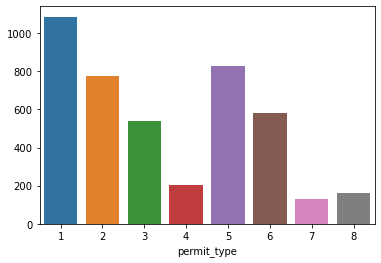

In [106]:
sns.barplot(x=permit_time.index,y=permit_time.values)

In [107]:
use_time = df_complete.groupby('simple_use')['complete_time'].mean()

<AxesSubplot:ylabel='simple_use'>

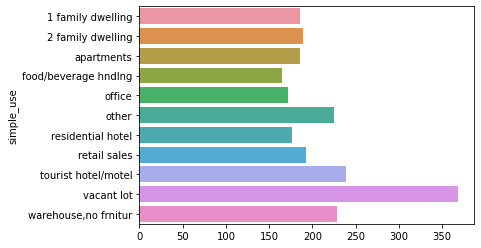

In [108]:
sns.barplot(y=use_time.index,x=use_time.values,orient='h')

# Findings

1. Zipcode and Construction Type
2. Permit Type has largest impact on completion time 
3. Undervaluing your project predicts more likely to complete

### 1. Zipcode and Construction Type

In [112]:
df_zip = df.copy()

In [113]:
df_zip['binned_zip'] = pd.cut(df_zip.zipcode,bins=[0.0,94109.0,94124.0,94159.0])

In [114]:
df_zip_dum = pd.get_dummies(df_zip,columns=['exist_construct_type'])

In [115]:
zip_graph = df_zip_dum.groupby('binned_zip')['exist_construct_type_1.0','exist_construct_type_2.0',
                                 'exist_construct_type_3.0','exist_construct_type_4.0',
                                 'exist_construct_type_5.0'].mean()
zip_graph

,exist_construct_type_1.0,exist_construct_type_2.0,exist_construct_type_3.0,exist_construct_type_4.0,exist_construct_type_5.0
binned_zip,,,,,
"(0.0, 94109.0]",0.412806,0.048921,0.132868,0.003854,0.401552
"(94109.0, 94124.0]",0.090473,0.015176,0.035674,0.002032,0.856645
"(94124.0, 94159.0]",0.091047,0.028226,0.034667,0.001628,0.844431


<AxesSubplot:ylabel='binned_zip'>

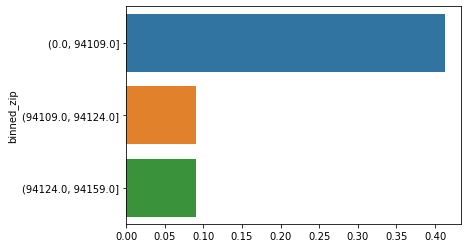

In [116]:
sns.barplot(y=zip_graph.index,x=zip_graph['exist_construct_type_1.0'].values)

<AxesSubplot:ylabel='binned_zip'>

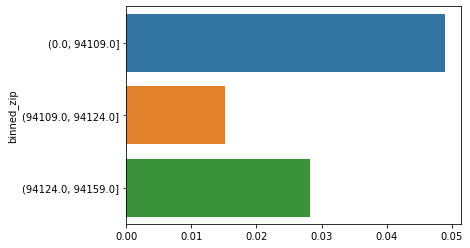

In [117]:
sns.barplot(y=zip_graph.index,x=zip_graph['exist_construct_type_2.0'].values)

<AxesSubplot:ylabel='binned_zip'>

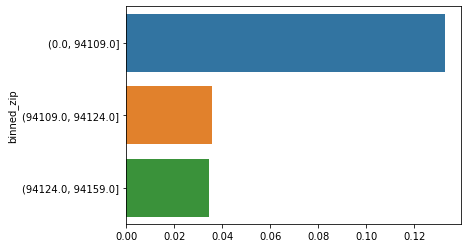

In [118]:
sns.barplot(y=zip_graph.index,x=zip_graph['exist_construct_type_3.0'].values)

<AxesSubplot:ylabel='binned_zip'>

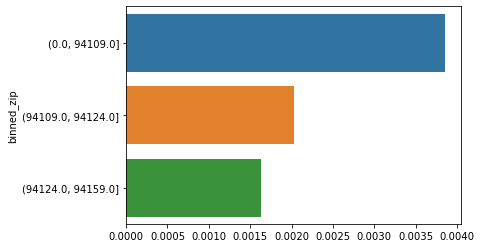

In [119]:
sns.barplot(y=zip_graph.index,x=zip_graph['exist_construct_type_4.0'].values)

<AxesSubplot:ylabel='binned_zip'>

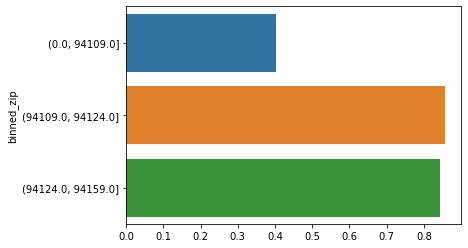

In [120]:
sns.barplot(y=zip_graph.index,x=zip_graph['exist_construct_type_5.0'].values)

**Construction Type 1:** high rise and mid rise office buildings

**Construction Type 2:** newer school buildings

**Construction Type 3:** warehouses and “ordinary” buildings with brick walls and wood ceilings

**Construction Type 4:** heavy timber, so wood with minimum dimension of 8 inches

**Construction Type 5:** wood framing, common for single family homes and apartments 

Looking at the charts above, we can see an interesting split that we partially observed when we were initially exploring our data. When we split construction type by neighborhood, we observed a pattern in certain groups. By splitting the data into 3 categories of zip codes, we could see that the blue zip group in charts above had a significantly higher proportion of construction types 1-4 compared to the other two, which had significantly higher proportions of construction type 5. 

From this, we can observe that the zip codes 94102 through 94109 are dominated by a range of construction materials, constituting a range of different uses for the area. This makes sense as it takes up the northeast portion of the city, which has a range of activities and building types. 

Zip codes blocks 94110 - 94124 and 94125 - 94159 have a significantly smaller proportion of construction types 1-4, but over two times the proportion of construction used on single family homes and apartments. This constitutes much more residential areas of the city. 

**Managerial Insight:** This can be useful data to a business looking to expand into San Francisco. If a business knows that it makes more profit by being closer to homes and apartments, a company can use this data to set up shop in the zip codes that dominate construction type 5. If instead the business observes that it makes more profit by being located closer to work spaces and office buildings, it would place itself within zip codes 94102-94109. 

### 2.0 Permit Type & Complete Time

In [121]:
s[(s > .01)|(s<-0.01)].sort_values()

permit_type_8                  -305.070033
permit_type_4                  -134.632119
year_2017                       -77.701131
year_2016                       -17.514850
simple_use_office                -7.468705
super_district_4.0               -1.414478
super_district_7.0               -0.340691
block_freq_enc                   -0.034881
st_num_freq_enc                  -0.017386
super_district_8.0                0.394967
descr_len                         0.497413
simple_st_suf_St                  0.753920
year_2014                         3.758472
year_2015                         5.442022
simple_use_1 family dwelling      5.596694
super_district_2.0                6.939022
permit_type_3                     7.685571
simple_use_vacant lot            38.565027
dtype: float64

<AxesSubplot:xlabel='permit_type'>

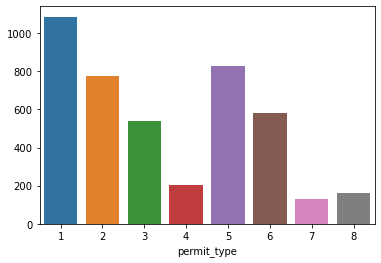

In [122]:
sns.barplot(x=permit_time.index,y=permit_time.values)

As you can see from the regression coefficients above, and the chart, permit type has a big influence on how long a project takes to complete. Permit types 8 & 4 have the biggest impact, reducing the average time it takes to complete projects that require those permits by a significant margin. 

**Managerial Insight:** A contractor can use this information when planning time estimates for customers' projects. If the project only requires permit types 4 or 8, the contractor can be relatively certain that the permitting process will take a very short time, and the whole construction should be completed much quicker. If instead it requires other types of permits, the contractor should know to allow a more flexible estimate for getting the project completed. By following this finding, a contractor can keep his customer from becoming frustrated with unknown project timelines. 

### 3. Cost Spread

In [123]:
## Column to show whether the project cost was initially 
## underestimated, initially overestimated, or estimated correctly.

df['underestimated'] = df.cost_diff.apply(lambda x: 'underestimated' if x > 0 
                                            else 'overestimated' if x < 0 else 'same')

In [124]:
#Binary column where 1 means the construction project was completed, and 0 if the project isn't completed

df['completed'] = df.current_status.apply(lambda x: 1 if x == 'complete' else 0)

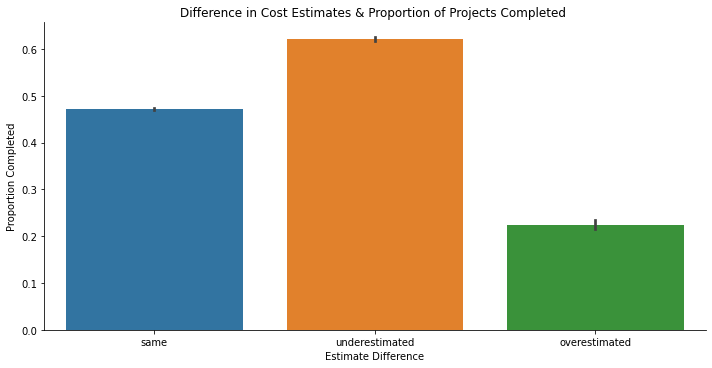

In [125]:
sns.catplot(x='underestimated', y='completed', data=df, kind='bar', aspect=2)\
.set(xlabel='Estimate Difference',ylabel='Proportion Completed', title='Difference in Cost Estimates \
& Proportion of Projects Completed ')

Based on the chart above, over 60% of the projects where the initial cost was underestimated were completed. On the other hand, less than 25% of the projects with an overestimated initial project cost were completed. This shows that you are more than twice as likely to get your construction project completed if you underestimate your initial cost of the project when you apply for the bulding permit. This is explainable when you consider the sunk cost fallacy. In the sunk cost fallacy, people tend to commit to business decisions and projects, even when the costs are more expensive, because they have already spent money on them.


**Managerial Insight:** Based on this finding, we recommend that the contractors working on projects for clients try to lower their initial cost estimates when they propose the project. Because of the sunk cost fallacy proven by our data, if the contractor underestimates the initial cost of the project, it more than doubles their chance of completing the project. This allows the contractor to earn all the revenue from the project, and run a more successful contracting business due to their high completion rate.